In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


# **Project Objective**

To develop machine learning model that predicts the **purchase value** of users by analyzing their **multi-session digital behavior**, enabling data-driven insights for customer value forecasting and business strategy.

# **1. Import Essential Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# **2. Data Loading**

**Observations:**

- Train Dataset contains `116023 Rows`, `52 Columns/Features`.
- Test Dataset contains `29006 Rows`, `51 Columns/Features`.
- `purchaseValue` is the **Target Feature**.
- Train Dataset conatins the following data types `object`, `float64`, `int64`, `bool`.

In [ ]:
train_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

In [ ]:
train_copy = train_df.copy()

In [ ]:
print(f'Shape of Train Dataset: {train_df.shape}')
print(f'Shape of Test Dataset: {test_df.shape}')

Shape of Train Dataset: (116023, 52)
Shape of Test Dataset: (29006, 51)


In [ ]:
train_df.head(10)

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0
5,True,28000000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,48,not available in demo dataset,1505506252,Americas,False,NaN
6,NaN,80510000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,17,not available in demo dataset,1472053897,Americas,False,1.0
7,NaN,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_5,NaN,not available in demo dataset,...,not available in demo dataset,mobile,Organic Search,not available in demo dataset,1,not available in demo dataset,1490756441,Asia,True,1.0
8,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,4,not available in demo dataset,1495702257,Asia,False,NaN
9,NaN,0.0,Safari,not available in demo dataset,NaN,(not provided),medium,Region_1,NaN,not available in demo dataset,...,not available in demo dataset,mobile,Organic Search,not available in demo dataset,1,not available in demo dataset,1500868868,Asia,True,1.0


In [ ]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


In [ ]:
train_df.dtypes

trafficSource.isTrueDirect                       object
purchaseValue                                   float64
browser                                          object
device.screenResolution                          object
trafficSource.adContent                          object
trafficSource.keyword                            object
screenSize                                       object
geoCluster                                       object
trafficSource.adwordsClickInfo.slot              object
device.mobileDeviceBranding                      object
device.mobileInputSelector                       object
userId                                            int64
trafficSource.campaign                           object
device.mobileDeviceMarketingName                 object
geoNetwork.networkDomain                         object
gclIdPresent                                      int64
device.operatingSystemVersion                    object
sessionNumber                                   

# **3. Exploratory Data Analysis (EDA)**

## **3.1 Statistical Analysis**

**Observation**
- Majority of columns are of **object type** (Categorical).
- Some features like `trafficSource.adContent`, `totals.bounces`, etc. have missing values.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

**Observation**
- `purchaseValue` has a highly skewed distribution.
- Many features (like `totals.visits`, `locationZone`) have constant values.
- Some features (e.g., `sessionNumber`, `pageViews`) show wide variability.

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
purchaseValue,116023.0,2.656393e+07,2.051825e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.312950e+10
userId,116023.0,6.109436e+04,3.524076e+04,0.000000e+00,3.060350e+04,6.101400e+04,9.161650e+04,1.222760e+05
gclIdPresent,116023.0,3.701852e-02,1.888080e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sessionNumber,116023.0,2.691311e+00,1.045161e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.470000e+02
totals.visits,116023.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
sessionId,116023.0,1.493429e+09,1.528798e+07,1.470035e+09,1.480066e+09,1.491646e+09,1.505079e+09,1.525157e+09
trafficSource.adwordsClickInfo.page,4281.0,1.019622e+00,1.745165e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
pageViews,116015.0,8.412352e+00,1.434494e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01,4.690000e+02
locationZone,116023.0,8.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
totals.bounces,47148.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Observation**
- **Many categorical columns have only 1 Unique value** (example `device.screenResolution`, `device.language`, `socialEngagementType`, etc.), contains only **"not available in demo dataset"**, these provide no predictive value and should be dropped.
- Columns like `browser`, `geoNetwork.city`, and `locationCountry` have high cardinality.

In [ ]:
train_df.describe(include=[object]).T

,count,unique,top,freq
trafficSource.isTrueDirect,42890,1,True,42890
browser,116023,34,Chrome,84508
device.screenResolution,116023,1,not available in demo dataset,116023
trafficSource.adContent,2963,53,Google Merchandise Store,1410
trafficSource.keyword,44162,566,(not provided),39066
screenSize,116023,1,medium,116023
geoCluster,116023,5,Region_2,23294
trafficSource.adwordsClickInfo.slot,4281,3,Top,2721
device.mobileDeviceBranding,116023,1,not available in demo dataset,116023
device.mobileInputSelector,116023,1,not available in demo dataset,116023


**Observation**
- **75% of purchase values are 0** indicates strong right skew.
- Max value is extremely high indicates heavy outliers.

In [ ]:
train_df['purchaseValue'].describe()

count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64

**Observation**
- `totalHits`, `pageViews`, and `sessionNumber` show moderate positive correlation with `purchaseValue`.
- Other numeric features show negligible or negative correlation.
- Some columns have **NaNs** in correlation due to constant or missing values.

In [ ]:
numeric_column = train_df.select_dtypes(include= ['int64','float64']).columns
train_df[numeric_column].corr()['purchaseValue'].sort_values(ascending=False)

purchaseValue                          1.000000
totalHits                              0.251651
pageViews                              0.248454
sessionNumber                          0.230585
userId                                -0.003469
gclIdPresent                          -0.005652
date                                  -0.010338
sessionStart                          -0.018537
sessionId                             -0.018537
trafficSource.adwordsClickInfo.page   -0.025839
totals.visits                               NaN
locationZone                                NaN
totals.bounces                              NaN
new_visits                                  NaN
Name: purchaseValue, dtype: float64

**Observation**
- Columns like `trafficSource.adContent` and `trafficSource.adwordsClickInfo.*` have high missing values.
- `pageViews`, `totals.bounces`, and `new_visits` have partial missing values.

In [ ]:
nullValues = train_df.isnull().sum()
nullValues[nullValues > 0].sort_values(ascending=False)

trafficSource.adContent                         113060
trafficSource.adwordsClickInfo.slot             111742
trafficSource.adwordsClickInfo.isVideoAd        111742
trafficSource.adwordsClickInfo.adNetworkType    111742
trafficSource.adwordsClickInfo.page             111742
trafficSource.referralPath                       73309
trafficSource.isTrueDirect                       73133
trafficSource.keyword                            71861
totals.bounces                                   68875
new_visits                                       35505
pageViews                                            8
dtype: int64

In [ ]:
train_df.isin(['NA','N/A','-','?',' ','nan','NAN']).sum()

trafficSource.isTrueDirect                      0
purchaseValue                                   0
browser                                         0
device.screenResolution                         0
trafficSource.adContent                         0
trafficSource.keyword                           0
screenSize                                      0
geoCluster                                      0
trafficSource.adwordsClickInfo.slot             0
device.mobileDeviceBranding                     0
device.mobileInputSelector                      0
userId                                          0
trafficSource.campaign                          0
device.mobileDeviceMarketingName                0
geoNetwork.networkDomain                        0
gclIdPresent                                    0
device.operatingSystemVersion                   0
sessionNumber                                   0
device.flashVersion                             0
geoNetwork.region                               0


**Observation**
- Found **236** duplicate rows, which can be removed to reduce noise.

In [ ]:
duplicatesCount = train_df.duplicated().sum()
print(f"Total {duplicatesCount} Duplicate Rows in Train Dataset")

Total 236 Duplicate Rows in Train Dataset


**Observation**
- Columns like `sessionStart`, `sessionId`, `userId` have high value of unique count.
- Many features have only 1 unique value (e.g., `device.language`, `browserVersion`, `screenColors`).

In [ ]:
train_df.nunique().sort_values(ascending=False)

sessionStart                                    107388
sessionId                                       107379
userId                                          100499
purchaseValue                                     6766
trafficSource.referralPath                         941
geoNetwork.city                                    695
date                                               638
trafficSource.keyword                              566
geoNetwork.region                                  388
sessionNumber                                      230
totalHits                                          225
locationCountry                                    193
pageViews                                          175
trafficSource                                      161
geoNetwork.metro                                   104
trafficSource.adContent                             53
browser                                             34
trafficSource.campaign                              28
geoNetwork

## **3.2 Data Visualization**

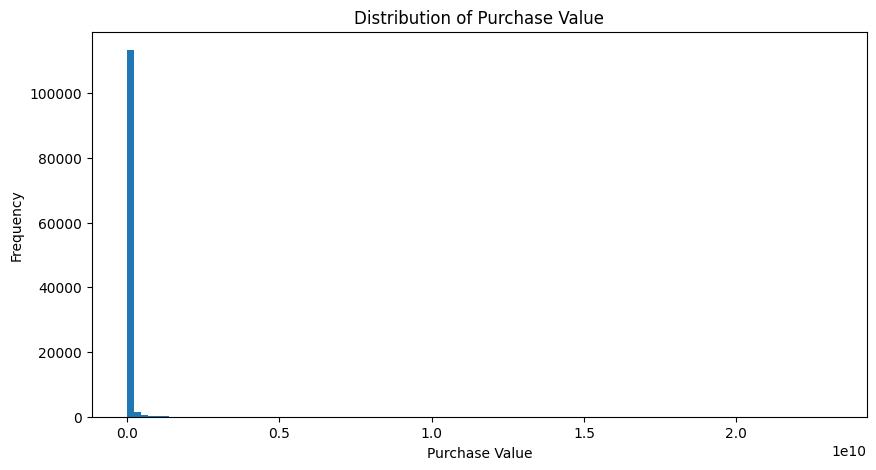

In [ ]:
plt.figure(figsize=(10,5))
plt.hist((train_df['purchaseValue']), bins=100)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

**Observation**
- **The histogram shows a large concentration of purchase values at the lower end**, with a long tail stretching to the right, indicating that most purchase are of low value, while a few purchases are exceptionally high.
- **The peak (mode) is near the smallest purchase values**, meaning the typical (average/median) purchase is relatively low, and high-value purchases are not common.

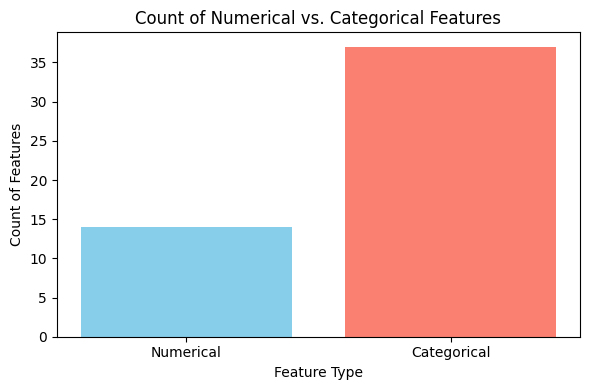

In [ ]:
numericalFeatures = train_df.select_dtypes(include=['int64', 'float64']).shape[1]
categoricalFeatures = train_df.select_dtypes(include=['object']).shape[1]

plt.figure(figsize=(6, 4))
plt.bar(['Numerical', 'Categorical'], [numericalFeatures, categoricalFeatures], color=['skyblue', 'salmon'])
plt.title('Count of Numerical vs. Categorical Features')
plt.ylabel('Count of Features')
plt.xlabel('Feature Type')
plt.tight_layout()
plt.show()

**Observation**
- **Categorical features dominates the train dataset**, with approx 2.5 times more than the categorical features compare to numerical features.
- **Just a small proportion of the train dataset consists of numerical features**, showing that accurate categorical feature encoding is critical for model effectiveness.

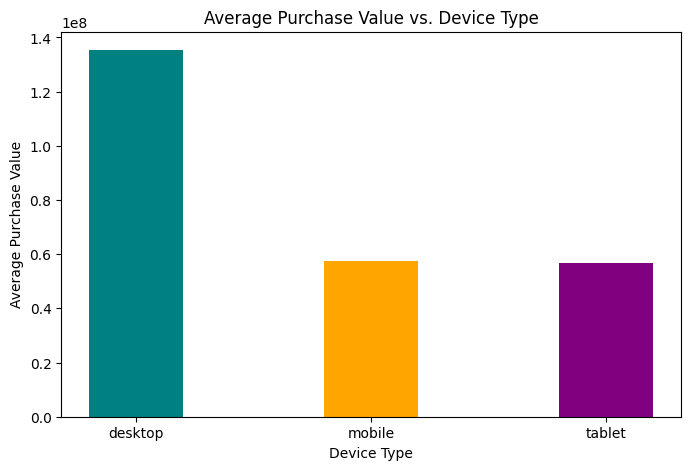

In [ ]:
deviceType = train_df['deviceType'].unique()
average_purchase_by_device = train_df[train_df['purchaseValue'] > 0].groupby('deviceType')['purchaseValue'].mean().sort_values(ascending=False)

colors = ['teal', 'orange', 'purple']
plt.figure(figsize=(8, 5))
plt.bar(average_purchase_by_device.index, average_purchase_by_device.values, color=colors, width=0.40)
plt.title('Average Purchase Value vs. Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Purchase Value')
plt.show()

**Observation**
- **Desktop users have the highest average purchase value compared to mobile and tablet users**, indicates a stronger purchasing intent or high value purchases on desktops.

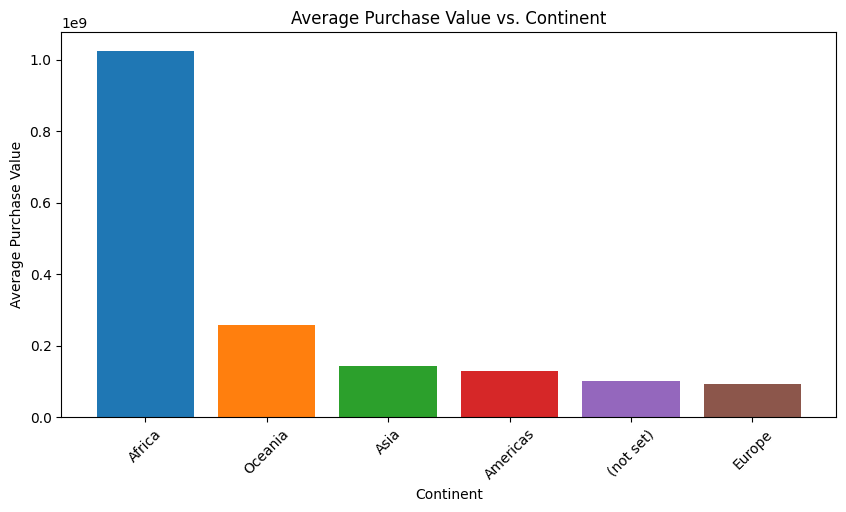

In [ ]:
continentPurchase = train_df[train_df['purchaseValue'] > 0].groupby('geoNetwork.continent')['purchaseValue'].mean().sort_values(ascending=False)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.figure(figsize=(10, 5))
plt.bar(continentPurchase.index, continentPurchase.values, color=colors)
plt.title('Average Purchase Value vs. Continent')
plt.ylabel('Average Purchase Value')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

**Observation**
- **Africa has the highest average purchase value** by a significant margin, indicating high value users.
- **Europe and (not set) have the lowest average purchase values**, suggesting lower user engagement or purchasing power.

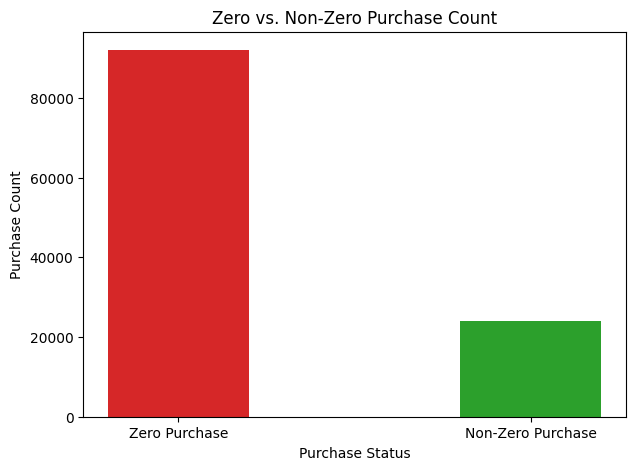

In [ ]:
colors = ['#d62728', '#2ca02c']
plt.figure(figsize=(7, 5))
plt.bar(['Zero Purchase', 'Non-Zero Purchase'], [(train_df['purchaseValue'] == 0).sum(), (train_df['purchaseValue'] != 0).sum()], width=0.40, color=colors)
plt.title('Zero vs. Non-Zero Purchase Count')
plt.xlabel('Purchase Status')
plt.ylabel('Purchase Count')
plt.show()

**Observation**
- **Majority of sessions resulted in zero purchases**, indicating low conversion rates.
- **Only a small portion made purchases**, highlighting the need for better engagement strategies.

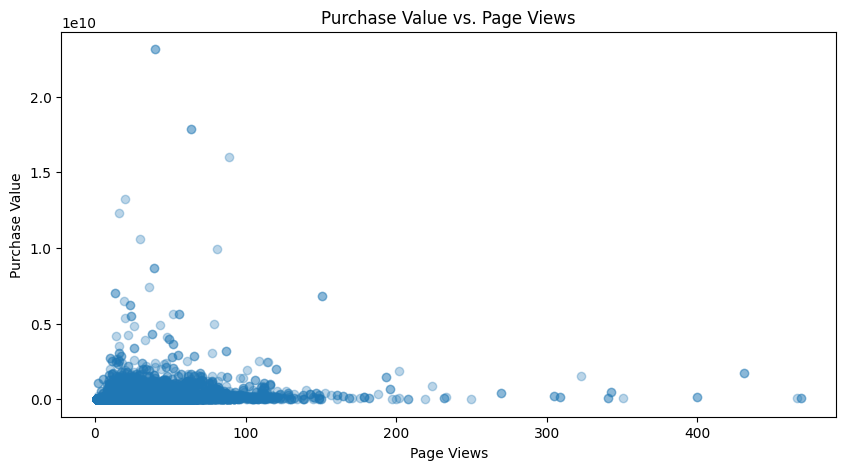

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(train_df['pageViews'], train_df['purchaseValue'], alpha=0.3)
plt.title('Purchase Value vs. Page Views')
plt.xlabel('Page Views')
plt.ylabel('Purchase Value')
plt.show()

**Observation**
- **Most users have low page views and low purchase values**, indicates limited engagement.
- **A few outliers show high purchase values at moderate page views**, indicates that less browsing can also lead to high value purchases.

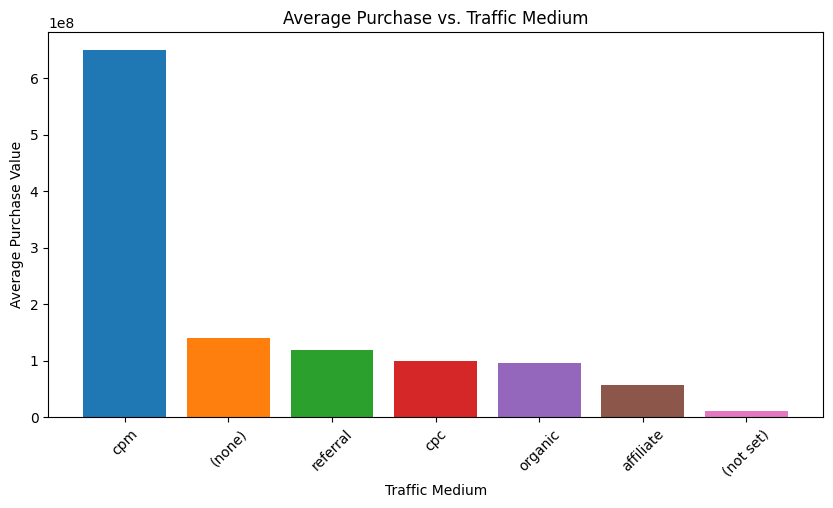

In [ ]:
averageMedium = train_df[train_df['purchaseValue'] > 0].groupby('trafficSource.medium')['purchaseValue'].mean().sort_values(ascending=False)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=(10, 5))
plt.bar(averageMedium.index, averageMedium.values, color=colors)
plt.title('Average Purchase vs. Traffic Medium')
plt.xticks(rotation=45)
plt.xlabel('Traffic Medium')
plt.ylabel('Average Purchase Value')
plt.show()

**Observation**
- **CPM (Cost Per Thousand Impressions) drives the highest average purchase value**, significantly best performing over all the other traffic mediums.
- **Organic, affiliate, and (not set) mediums yield the lowest average purchase values**, indicates that they are less effective for high value conversions.

In [ ]:
train_df['date'].head()

0    20170714
1    20170519
2    20171020
3    20170103
4    20161006
Name: date, dtype: int64

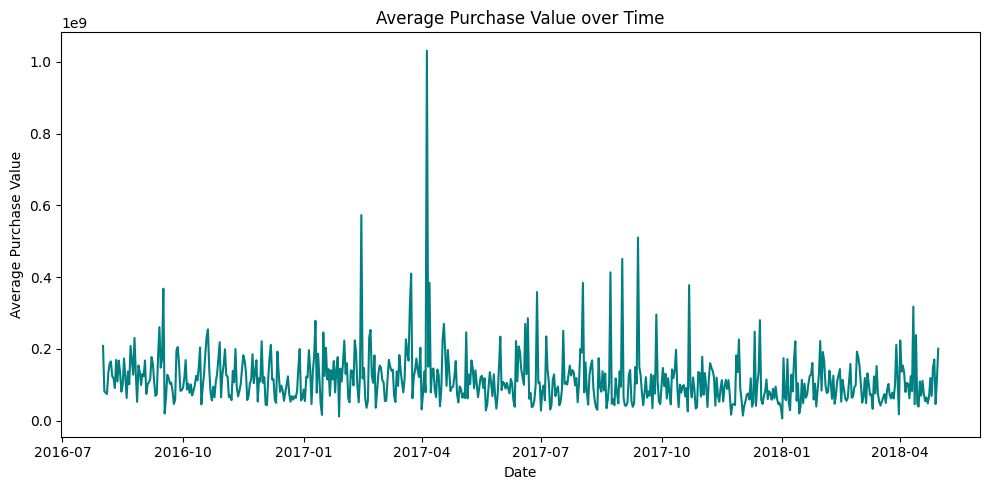

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'].astype(str), format='%Y%m%d')
averageDate = train_df[train_df['purchaseValue'] > 0].groupby('date')['purchaseValue'].mean()

plt.figure(figsize=(10, 5))
plt.plot(averageDate.index, averageDate.values, color='teal')
plt.title('Average Purchase Value over Time')
plt.xlabel('Date')
plt.ylabel('Average Purchase Value')
plt.tight_layout()
plt.show()

**Observation**
- **The average purchase value varies over time**, with multiple strong spikes reflecting occasional high value purchases.
- **Despite the spikes, the overall trend remains relatively constant**, without a clear upward or downward pattern.

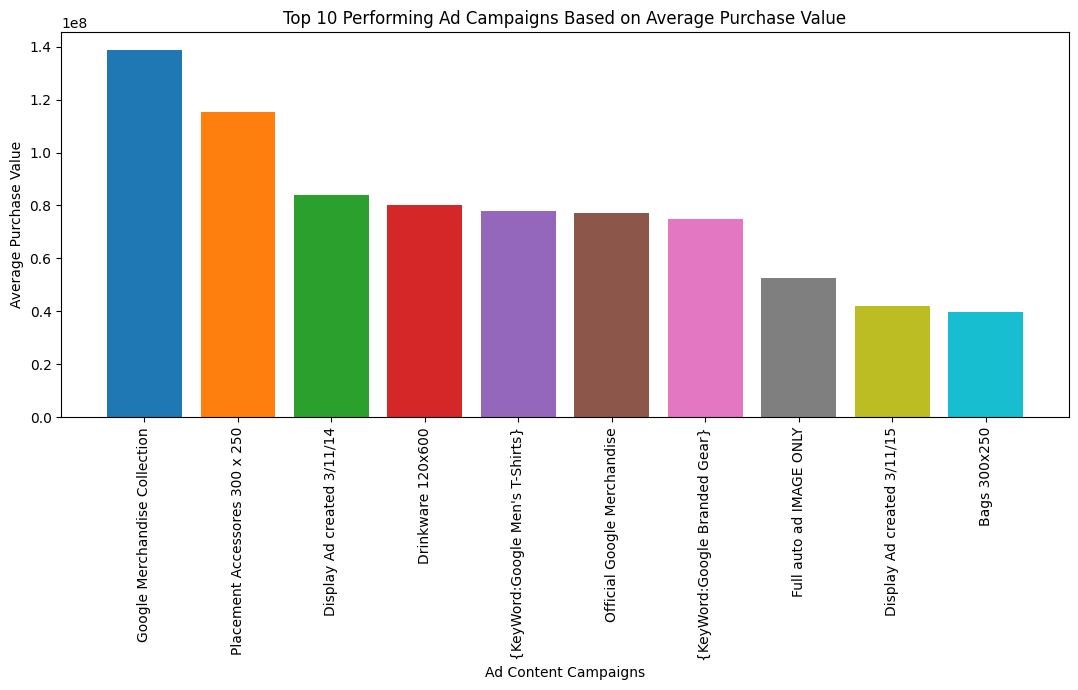

In [ ]:
adsContent = train_df[train_df['purchaseValue'] > 0].groupby('trafficSource.adContent')['purchaseValue'].mean().dropna().sort_values(ascending=False).head(10)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(13, 5))
plt.bar(adsContent.index, adsContent.values, color=colors)
plt.title('Top 10 Performing Ad Campaigns Based on Average Purchase Value')
plt.xticks(rotation=90)
plt.ylabel('Average Purchase Value')
plt.xlabel('Ad Content Campaigns')
plt.show()

**Observation**
- **The Google Merchandise Collection campaign performs best over all the others with the highest average purchase value**, indicating its strong effectiveness for high purchase value conversions.
- **There is a slowly decline in performance from top to bottom**, indicating that while multiple campaigns perform well, only the top 2-3 have a much greater influence than the others.

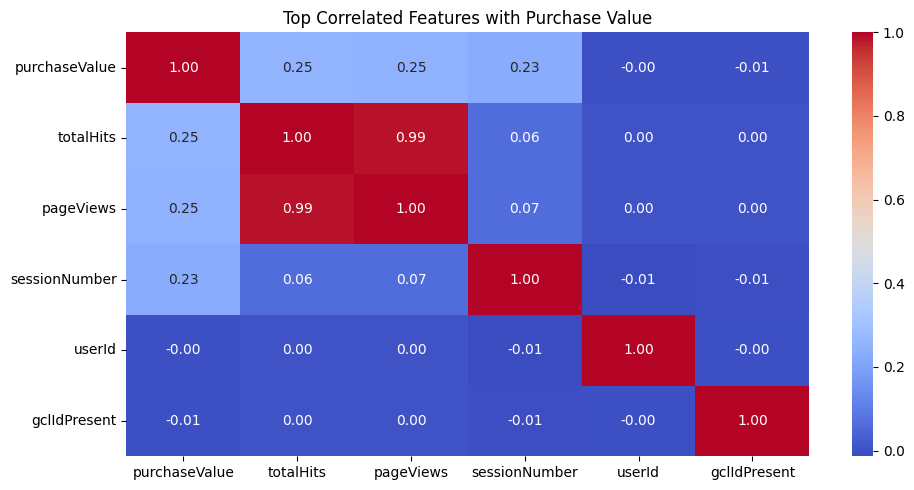

In [ ]:
corr = train_df.select_dtypes(include=['int64', 'float64']).corr()
top_corr = corr['purchaseValue'].sort_values(ascending=False).head(6).index

plt.figure(figsize=(10, 5))
sns.heatmap(train_df[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with Purchase Value')
plt.tight_layout()
plt.show()

**Observation**
- **`totalHits`, `pageViews`, and `sessionNumber` show the strongest positive correlations with `purchaseValue`**, indicates that the user engagement metrics are key indicators of purchase behavior.

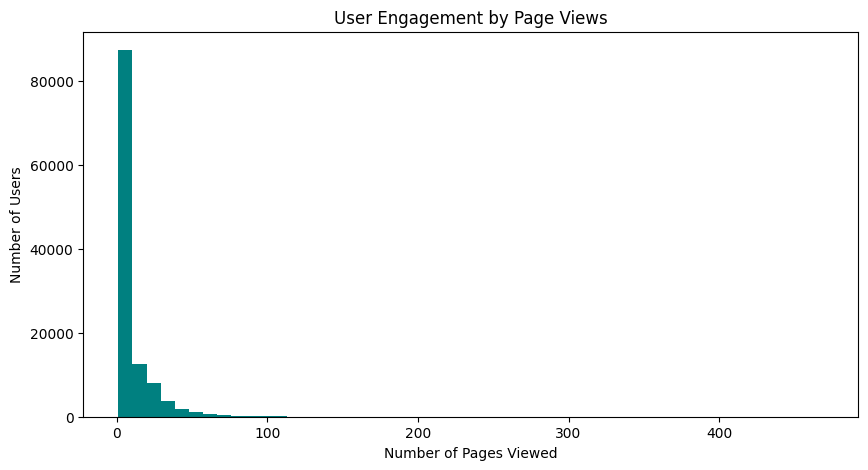

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train_df['pageViews'], bins=50, color='teal')
plt.title('User Engagement by Page Views')
plt.xlabel('Number of Pages Viewed')
plt.ylabel('Number of Users')
plt.show()

**Observation**
- **Most users view very few pages**, indicating low engagement per session for the majority.
- **A small number of users have high page views**, showing there are some highly engaged users.

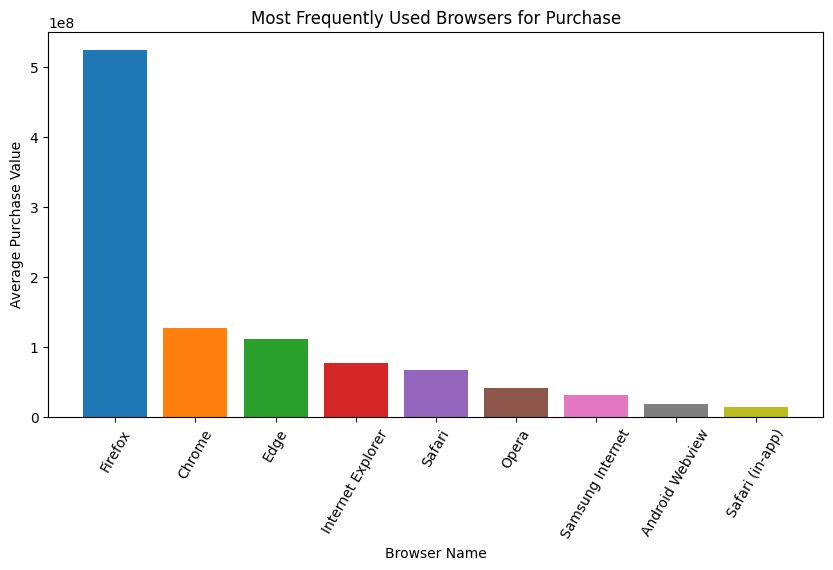

In [ ]:
browser_avg_purchase = train_df[train_df['purchaseValue'] > 0].groupby('browser')['purchaseValue'].mean()
Browser = browser_avg_purchase.sort_values(ascending=False).head(10)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(10, 5))
plt.bar(Browser.index, Browser.values, color=colors)
plt.title('Most Frequently Used Browsers for Purchase')
plt.xlabel('Browser Name')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=60)
plt.show()

**Observation**
- **Firefox has the highest average purchase value by a large margin**, indicating it attract more high value users.
- **Browsers like Android Webview and Safari (in-app) have significantly lower average purchase values**, indicating lower user intent or session value on mobile/in-app platforms.

# **4. Data Cleaning, Preprocessing & Feature Engineering**

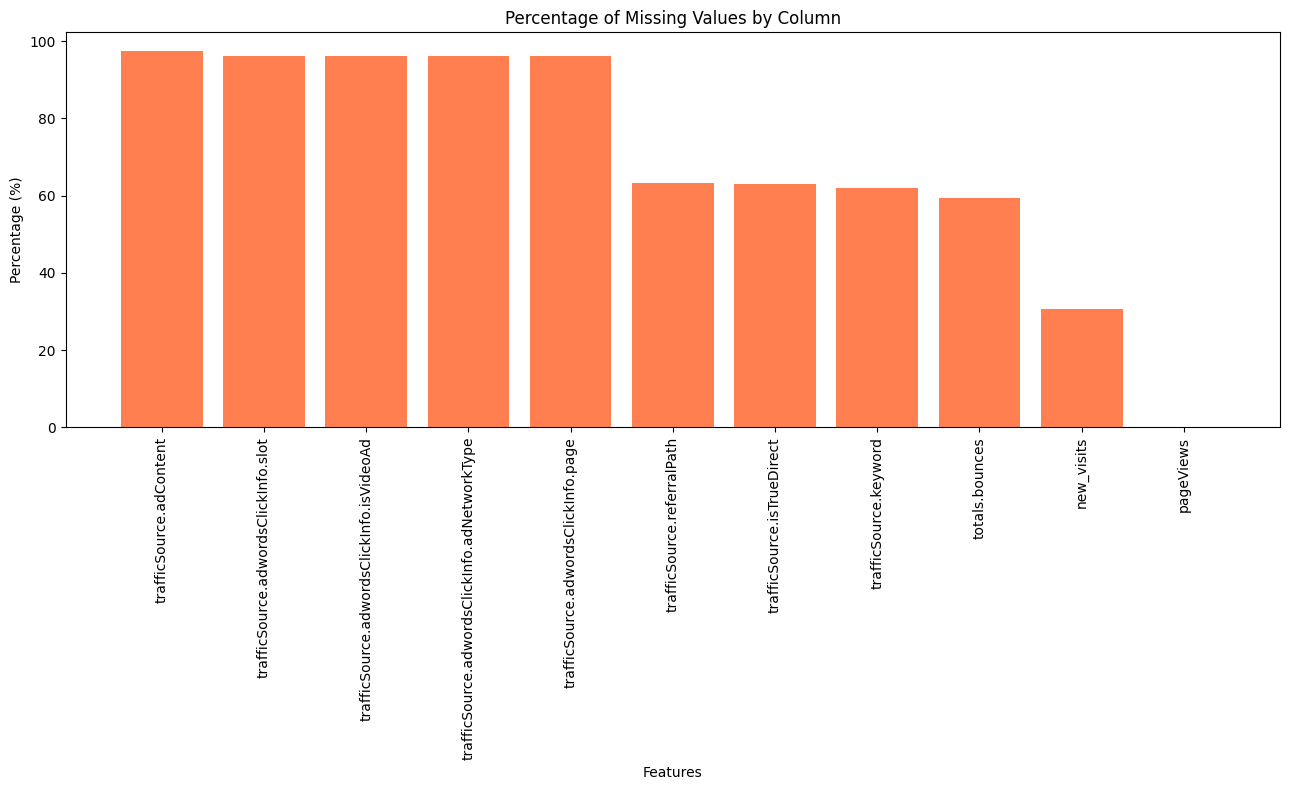

In [ ]:
nullValuesPercent = round((train_df.isnull().sum()) / train_df.shape[0] * 100, 2)
nullValuesPercent = nullValuesPercent[nullValuesPercent > 0].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
plt.bar(nullValuesPercent.index, nullValuesPercent.values, color='coral')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation**
- Calculates the Percentage of null values per columns and identifies columns with **more than 60% missing/null data and drop them**.

In [ ]:
nullPercent = (train_df.isnull().sum() / train_df.shape[0]) * 100
column = nullPercent[nullPercent > 60].index
train_df.drop(columns=column, inplace=True)

print("Dropped columns:", list(column))

Dropped columns: ['trafficSource.isTrueDirect', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath']


**Observation**
- Drops the **Duplicates rows** from the Train dataset.

In [ ]:
train_df = train_df.drop_duplicates()
print(f"Successfully removed {duplicatesCount} duplicate rows!")

Successfully removed 236 duplicate rows!


**Observation**

* **`userAveragePurchase`**: Average purchase amount per user, based only on non-zero purchase sessions.

* **`userEngagementScore`**: Weighted metric combining page views and total hits, normalized by session count.

* **`pageViews (log1p)`**: Log-transformed number of pages viewed in a session to reduce skewness.

* **`totalHits (log1p)`**: Log-transformed total hits during the session for normalization.

* **`sessionNumber (log1p)`**: Log-transformed session count to stabilize distribution.

* **`hour`**: Hour of day (0–23) extracted from session start time.

* **`weekday`**: Day of the week (0 = Monday, 6 = Sunday) from session start time.

* **`month`**: Calendar month (1–12) extracted from session start timestamp.

* **`isWorkingHour`**: Binary flag indicating if the session occurred during typical work hours (9 AM – 5 PM).

* **`viewTimesSession`**: Interaction term combining page views and session number.

* **`viewTimesHits`**: Interaction term combining page views and total hits.

* **`sessionTimesHits`**: Interaction term between session count and total hits.

* **`hitsToPageViews`**: Ratio of total hits to page views — indicates interaction depth per page.

* **`sessionRecordCount`**: Number of times the same sessionId appears — useful for multi-record sessions.

* **`returningUser`**: Binary flag indicating if the user viewed more than 1 page in a session.

* **`avgActivityPerSession`**: Mean of total activity (page views + hits) divided by session number.

* **`viewHitRatioPerSession`**: Compound metric capturing how view-hit interactions scale with sessions.

* **`totalUserActivityScore`**: Product of interaction efficiency (hits/page) and average activity per session.

* **`sessionEngagement`**: Total session-level engagement based on session count and its recurrence.

In [ ]:
avgUserPurchase = train_df[train_df['purchaseValue'] > 0].groupby('userId')['purchaseValue'].mean()
train_df['userAveragePurchase'] = train_df['userId'].map(avgUserPurchase).fillna(avgUserPurchase.median())

def newFeatures(train_df):
    train_df['userEngagementScore'] = (train_df['pageViews'] * 2 + train_df['totalHits'] * 2) / (train_df['sessionNumber'] + 1e-5)

    train_df['pageViews'] = np.log1p(train_df['pageViews'])
    train_df['totalHits'] = np.log1p(train_df['totalHits'])
    train_df['sessionNumber'] = np.log1p(train_df['sessionNumber'])

    ts = pd.to_datetime(train_df['sessionStart'], unit='s')
    train_df['hour'] = ts.dt.hour
    train_df['weekday'] = ts.dt.weekday
    train_df['month'] = ts.dt.month
    train_df['isWorkingHour'] = train_df['hour'].between(9, 17).astype(int)

    train_df['viewTimesSession'] = train_df['pageViews'] * train_df['sessionNumber']
    train_df['viewTimesHits'] = train_df['pageViews'] * train_df['totalHits']
    train_df['sessionTimesHits'] = train_df['sessionNumber'] * train_df['totalHits']
    train_df['hitsToPageViews'] = train_df['totalHits'] / (train_df['pageViews'] + 1e-4)

    train_df['sessionRecordCount'] = train_df.groupby('sessionId')['sessionNumber'].transform('count')

    train_df['returningUser'] = (train_df['pageViews'] > 1).astype(int)

    train_df['avgActivityPerSession'] = (train_df['pageViews'] + train_df['totalHits']) / (train_df['sessionNumber'] + 1)
    train_df['viewHitRatioPerSession'] = train_df['viewTimesHits'] / (train_df['sessionNumber'] + 1e-5)
    train_df['totalUserActivityScore'] = train_df['hitsToPageViews'] * train_df['avgActivityPerSession']
    train_df['sessionEngagement'] = train_df['sessionNumber'] * train_df['sessionRecordCount']

    # Today

    return train_df

train_df = newFeatures(train_df)

**Observation**

- **featuresDropping function** removes columns that are either have **1 unique values** or **over 10% uninformative values** like `"not available in demo dataset"` or `"(not set)"`, helping reduce noise and irrelevant columns from the dataset.

In [ ]:
def featuresDropping(train_df):
    featuresList = []
    for col in train_df.columns:
        if train_df[col].nunique(dropna=False) == 1:
            featuresList.append(col)
        elif train_df[col].isin(['not available in demo dataset', '(not set)']).sum() > 0.1 * len(train_df):
            featuresList.append(col)

    train_df = train_df.drop(columns=featuresList, errors='ignore')

    return train_df

train_df = featuresDropping(train_df)

In [ ]:
train_df.drop(columns=['userId',
                       'sessionId',
                       'sessionStart',
                       'date',
                       'device.isMobile',
                       'locationCountry',
                       'geoNetwork.subContinent',
                       'geoCluster',
                       'os',
                       'gclIdPresent',
                       'trafficSource',
                       'userChannel',
                       'geoNetwork.networkDomain',
                       'totals.bounces',
                       'new_visits'],
              inplace=True)

**Observation**

- The train dataset is split into **X (features)** and **y (purchaseValue target variable)** for model training.
- Data is split into **80% training and 20% testing sets** using a fixed `random_state=42`.

In [ ]:
X = train_df.drop(columns=['purchaseValue'])
y = train_df['purchaseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   browser                 115787 non-null  object 
 1   sessionNumber           115787 non-null  float64
 2   trafficSource.medium    115787 non-null  object 
 3   pageViews               115779 non-null  float64
 4   deviceType              115787 non-null  object 
 5   totalHits               115787 non-null  float64
 6   geoNetwork.continent    115787 non-null  object 
 7   userAveragePurchase     115787 non-null  float64
 8   userEngagementScore     115779 non-null  float64
 9   hour                    115787 non-null  int32  
 10  weekday                 115787 non-null  int32  
 11  month                   115787 non-null  int32  
 12  isWorkingHour           115787 non-null  int64  
 13  viewTimesSession        115779 non-null  float64
 14  viewTimesHits           1

**Observation**

- Numerical (int64, float64) and categorical (object) features are identified separately for targeted preprocessing.
- **Numerical features:** Missing values filled with median, then standardized using StandardScaler.
- **Categorical features:** Missing values filled with 'missing', then converted using one-hot encoding.
- **ColumnTransformer**: Applies this pipeline for both numerical and categorical features.

In [ ]:
numericalFeatures = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricalFeatures = X.select_dtypes(include=['object']).columns.tolist()

numericalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categoricalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_1 = ColumnTransformer(transformers=[
        ('num', numericalTransformer, numericalFeatures),
        ('cat', categoricalTransformer, categoricalFeatures)])

**Observation**

- Strongly correlated (`bestFeatures`) and weakly correlated (`extraFeatures`) numerical features are handled with separate preprocessing pipelines.
- Applies PolynomialFeatures (interaction only) only to `bestFeatures` to capture their combined effects and non-linear relationships.
- Standard scaling is applied to both numeric groups to normalize the data and improve model performance.
- Categorical features are imputed and one-hot encoded, and the entire pipeline processes all feature groups (`bestFeatures`, `extraFeatures`, `categoricalFeatures`) in preparation for model training.

In [ ]:
numericCorr = train_df.select_dtypes(include='number').corr()['purchaseValue']
numericCorr = numericCorr.drop('purchaseValue').sort_values(ascending=False)
numericFeatures = numericCorr.index.to_list()
bestFeatures = numericCorr[numericCorr.values > 0].index.to_list()
extraFeatures = list(set(numericFeatures) - set(bestFeatures))

bestFeaturesPipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('scaler', StandardScaler())
])

extraFeaturesPipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoricalPipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_2 = ColumnTransformer([
    ('important_numeric', bestFeaturesPipe, bestFeatures),
    ('other_numeric', extraFeaturesPipe, extraFeatures),
    ('categorical', categoricalPipe, categoricalFeatures)
], remainder='passthrough')

# **5. Model Training**

## **5.1 DummyRegressor Model as Baseline**

In [ ]:
dummyModel = DummyRegressor()
dummyModel.fit(X_train, y_train)

print("Dummy Regressor R2 Score:", round((dummyModel.score(X_test, y_test)), 4))

Dummy Regressor R2 Score: -0.0001


## **5.2 LinearRegreesion Model**

**Observation**
- A Linear Regression model was trained using the preprocessed features.
  
- The model achieved an R² score of **0.4909** on the Validation set.

- Used Linear Regressing Model as a basic starting model to check how well data preprocessing works. (Not LR)

In [ ]:
linearRegressionModel = Pipeline(steps=[
    ('preprocessor', preprocessor_1),
    ('regressor', LinearRegression(n_jobs=-1))])

linearRegressionModel.fit(X_train, y_train)
print("LinearRegression R2 Score:", round((linearRegressionModel.score(X_test, y_test)), 4)) #0.4909

LinearRegression R2 Score: 0.4909


## **5.3 RandomForest Regressor Model**

**Observation**
- Random Forest Regressor with 50 estimators and max depth of 6 was trained using preprocessed data.
  
- The model achieved an R² score of **0.6208** on the Validation set, showing better performance than Linear Regression.

- Used Random Forest model for its ability to handle non-linear relationships and reduce overfitting.

In [ ]:
randomForestModel = Pipeline(steps=[
    ('preprocessor', preprocessor_1),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=6, n_jobs=-1, random_state=42))])

randomForestModel.fit(X_train, y_train)
print("RandomForest R2 Score:", round((randomForestModel.score(X_test, y_test)), 4)) #0.6208

RandomForest R2 Score: 0.6208


## **5.4 Xgboost Regressor Model**

**Observation**

- The model achieved **R² score of 0.7416** on the validation set, showing the best performance among all other models.

- Used XGBoost Regressor for its ability to handle complex non-linear relationships, manage missing data internally, and provide built-in regularization to reduce overfitting.

In [ ]:
xgModel = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('regressor', XGBRegressor(learning_rate=0.1,
                               max_depth=7,
                               n_estimators=835,
                               random_state=42,
                               n_jobs=-1))])

xgModel.fit(X_train, y_train)
print("XGBRegressor R2 Score:", round((xgModel.score(X_test, y_test)), 4))

#0.7416 - 0.79075 on test

XGBRegressor R2 Score: 0.7416


## **5.5 Hyperparameter Tunning for XGBoost Model**

**Observation**

- Used RandomizedSearchCV to tune the hyperparameters of the XGBoost Regressor using 5-fold cross-validation.

- The model searched over a wide range of values for key parameters such as n_estimators, max_depth, learning_rate, reg_alpha, and reg_lambda.

```python
params = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__max_depth': randint(3, 10),
    'regressor__learning_rate': uniform(0.01, 0.2)
}

xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1))
])

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
XgbSearchModel = search.best_estimator_
print("Tuned R2 Score:", round(XgbSearchModel.score(X_test, y_test), 4))

## **5.6 Model Comparison**

**Observation**

- The line graph clearly shows a steady increase in R2 score across models.

- The Dummy Regressor performs worst (nearly 0), Linear Regression shows moderate performance (0.54), Random Forest improves significantly (0.69), and XGBoost achieves the best result (0.78), indicating its strong ability of model to capture complex patterns in the data.

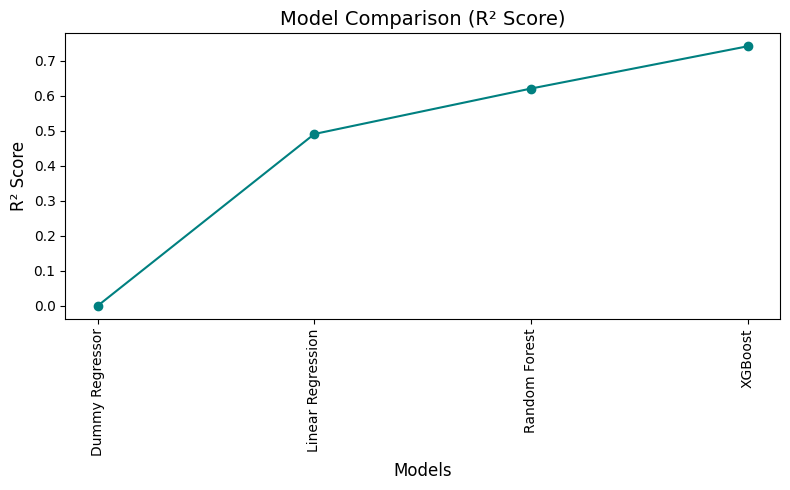

In [ ]:
modelNames = ['Dummy Regressor', 'Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [-0.0001, 0.4909, 0.6208, 0.7416]

plt.figure(figsize=(8, 5))
plt.plot(modelNames, r2_scores, marker='o', color='teal')

plt.title('Model Comparison (R² Score)', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **6. Generate and Save Submission file**

In [ ]:
def test_df_preprocessing(test_df):
    null_percent_per_col = (test_df.isnull().sum() / test_df.shape[0]) * 100
    columns_to_drop = null_percent_per_col[null_percent_per_col > 60].index
    test_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Feature Engineering
    test_df['userAveragePurchase'] = test_df['userId'].map(avgUserPurchase).fillna(avgUserPurchase.median())
    test_df = newFeatures(test_df)

    # Feature Dropping
    test_df = featuresDropping(test_df)

    return test_df

test_df = test_df_preprocessing(test_df)

In [ ]:
test_df = test_df[X_train.columns]

test_predictions = xgModel.predict(test_df)
submission = pd.DataFrame({"id": range(test_predictions.shape[0]), "purchaseValue": test_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
